---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by André Almeida*  

---

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

## **1. Entendimento do Problema**

***Churn rate***, ou simplesmente *churn*, representa a **taxa de evasão** da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o **Custo de Aquisição de Cliente (CAC)** é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

Entender por que os clientes abandonam o seu produto é muito importante para o **crescimento sustentável**.

---

**Como fazer para calcular a sua taxa de churn?**

A taxa de churn geralmente é calculada num determinado período, seja anual, semestral ou mensal.

Por exemplo: se 1 de cada 20 clientes cancelam seu produto todo mês, isso representa que a taxa de churn para seu produto será de 5%.

Você também pode calcular a taxa de churn, que irá representar o percentual de contas que estão cancelando em comparação com a base de cliente ativos, da seguinte forma:

**Churn Rate: total de clientes cancelados / número total de clientes ativos do último mês**

[fonte](https://resultadosdigitais.com.br/marketing/o-que-e-churn/).

---

A taxa de churn depende de [vários fatores](https://www.exactsales.com.br/o-que-e-taxa-de-churn/), como:

- O bom relacionamento com seus clientes;
- A percepção de valor do produto que você está oferecendo;
- A autoridade e credibilidade que sua empresa tem no assunto;
- O tipo de atendimento que é prestado desde o primeiro contato.

Em sistemas complexos, avaliar todas estas variáveis é imprescindível para o sucesso da empresa. Geralmente, quando um usuário desiste de assinar um serviço é porque não vê mais valor naquele serviço oferecido por determinada empresa.

Entender e extrair informações de um conjunto extenso de dados de clientes é desafiador, e é aqui que o **Machine Learning** pode ajudar empresas a traçar perfis de seus clientes e identificar possíveis cancelamentos antes de acontecer.

In [1]:
# Imports necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from urllib.request import urlopen
import json

from sklearn.model_selection import train_test_split

import warnings

In [2]:
# Definindo configurações iniciais
sns.set_theme(style="whitegrid", palette='Set2')

In [3]:
# Teste para capturar o hex da paleta de cores
pal = sns.color_palette('Set2', n_colors=10)
colors = pal.as_hex()
print(colors)
colors

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3', '#66c2a5', '#fc8d62']


['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3',
 '#66c2a5',
 '#fc8d62']

## **2. Entendimento e Visualização dos Dados**

In [4]:
# Carregando os dados no formato json
path = '/content/Telco-Customer-Churn.json'

# Abrindo arquivo json para leitura
with open(path) as f:
  data_json = json.load(f)

In [5]:
# Olhando os dados em um DataFrame
pd.DataFrame(data_json).head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Podemos ver que os dados estão dividios em **quatro grupos distintos**:

- Informações pessoais sobre o usuário e meses de contrato.
- Informações sobre assinatura do serviço telefônico.
- Informações sobre serviços na assinatura de internet.
- Informações sobre o contrato do usuário e gastos.

In [6]:
# Convertendo o json para DataFrame já normalizado no formato de tabela
dados = pd.json_normalize(data_json)

# Verificando tamanho do dataframe
dados.shape

(7267, 21)

In [7]:
# Olhando os dados
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
# Nomes das colunas
dados.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [9]:
# Mapeamento dos nomes das colunas para renomear
rename = {'customer.gender':'Gender', 'customer.SeniorCitizen':'SeniorCitizen', 'customer.Partner':'Partner', 'customer.Dependents':'Dependents',
          'customer.tenure':'Tenure', 'phone.PhoneService':'PhoneService', 'phone.MultipleLines':'MultipleLines', 'internet.InternetService':'InternetService',
          'internet.OnlineSecurity':'OnlineSecurity', 'internet.OnlineBackup':'OnlineBackup', 'internet.DeviceProtection':'DeviceProtection', 
          'internet.TechSupport':'TechSupport', 'internet.StreamingTV':'StreamingTV', 'internet.StreamingMovies':'StreamingMovies',
          'account.Contract':'Contract', 'account.PaperlessBilling':'PaperlessBilling', 'account.PaymentMethod':'PaymentMethod',
          'account.Charges.Monthly':'Charges_Monthly', 'account.Charges.Total':'Charges_Total'}

# Renomeando as colunas
dados.rename(columns=rename, inplace=True)
dados.columns

Index(['customerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly',
       'Charges_Total'],
      dtype='object')

In [10]:
# Info dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   Gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   Tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [11]:
# Estatística básica dos dados numéricos
dados.describe()

,SeniorCitizen,Tenure,Charges_Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [12]:
# Dados faltantes
dados.isnull().sum()

customerID          0
Churn               0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges_Monthly     0
Charges_Total       0
dtype: int64

Não há dados faltantes. **Mas, e dados inconsistentes???**

O Atributo **Charges_Total** parece estar no formato não adequado.

Por ser uma informação numérica tentei converter para float64, mas descrobri que há uma inconsistência na linha 975 dos dados.

In [13]:
# O valor total gasto está vazio, logo não é possível converter para numérico. 
# Irei verificar todos os dados desta coluna a seguir.

dados.loc[975,'Charges_Total']

' '

In [14]:
# Olhando os dados por coluna para tentar ver se há alguma inconsistência dos dados não numéricos além do veriricado anteriormente
for column in dados.columns[1:]:
  print(f'Coluna {column}: {dados[column].unique()}')
  print('--------'*5)

Coluna Churn: ['No' 'Yes' '']
----------------------------------------
Coluna Gender: ['Female' 'Male']
----------------------------------------
Coluna SeniorCitizen: [0 1]
----------------------------------------
Coluna Partner: ['Yes' 'No']
----------------------------------------
Coluna Dependents: ['Yes' 'No']
----------------------------------------
Coluna Tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
----------------------------------------
Coluna PhoneService: ['Yes' 'No']
----------------------------------------
Coluna MultipleLines: ['No' 'Yes' 'No phone service']
----------------------------------------
Coluna InternetService: ['DSL' 'Fiber optic' 'No']
----------------------------------------
Coluna OnlineSecurity: ['No' 'Yes' 'No internet service']
----------------------------------------
Co

**Inconsistência detectadas**:

- Coluna Churn com dados sem valor real
- Coluna Charges_Total no formato texto e com dados faltantes.
- Coluna SeniorCitizen no formato não adequado

### **Corrigindo o Charges_Total e o Churn com inconsistência**

In [15]:
# Olhando a inconsistência diretamente na coluna Charges_Total
dados.query('Charges_Total == " "')

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [16]:
# Olhando a inconsistência diretamente na coluna Churn
dados.query('Churn == ""')

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


- Há 11 instâncias com os dados de Charges_Total faltando. Todas com **Churn = No**

- Há 224 instâncias com dados de churn faltando.

Antes de excluir, irei verificar o balanceamento dos dados considerando o Churn.

In [17]:
# Contando os dados por churn
dados['Churn'].value_counts()

No     5174
Yes    1869
        224
Name: Churn, dtype: int64

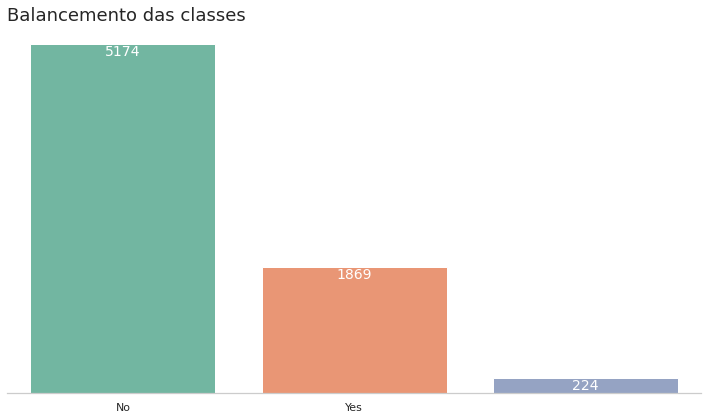

In [18]:
# Plot para ver balanceamento dos dados

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(x=dados['Churn'].unique(), y=dados['Churn'].value_counts(), ax=ax)
ax.set_title('Balancemento das classes', fontsize=18, loc='left')
ax.set_ylabel('').set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft = False)

for i in range(dados['Churn'].unique().shape[0]):
  valor_y = dados['Churn'].value_counts()
  ax.text(i, valor_y[i], valor_y[i], fontsize=14, color='white', horizontalalignment='center', verticalalignment='top')

ax.grid(False)
plt.tight_layout()

In [19]:
# Calculando a porcentagem
porc_f = dados.query('Churn == ""').shape[0] / dados.shape[0] * 100
porc_f_No = dados.query('Churn == ""').shape[0] / dados.query('Churn == "No"').shape[0] * 100

print(f'A quantidade de dados sem a informação de Churn representa {porc_f:.2f}% de todo o dataset.')
print(f'A quantidade de dados sem a informação de Churn representa {porc_f_No:.2f}% dos dados com Churn = No.')

A quantidade de dados sem a informação de Churn representa 3.08% de todo o dataset.
A quantidade de dados sem a informação de Churn representa 4.33% dos dados com Churn = No.


Com a análise acima, concluo que posso excluir os dados com esta inconsistência.

In [20]:
# Eliminando as linhas com dados inconsistentes
dados.drop(index=dados.query('Charges_Total == " "').index, axis=0, inplace=True)
dados.drop(index=dados.query('Churn == ""').index, axis=0, inplace=True)

In [21]:
# Convertendo os valores para float
dados['Charges_Total'] = dados['Charges_Total'].astype(float)

In [22]:
dados.shape

(7032, 21)

In [23]:
# Contando os dados por churn
dados['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

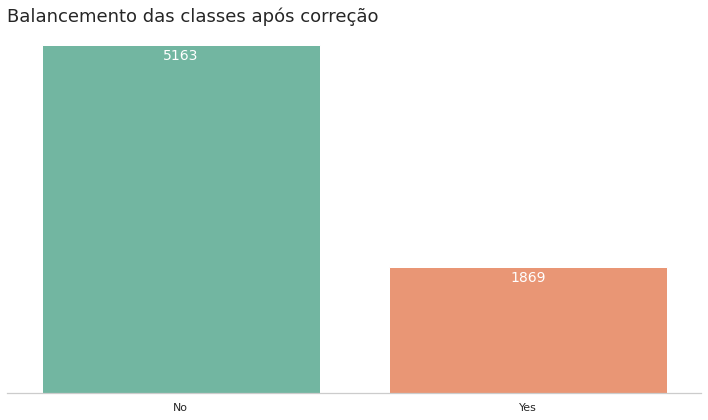

In [24]:
# Plot para ver balanceamento dos dados

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(x=dados['Churn'].unique(), y=dados['Churn'].value_counts(), ax=ax)
ax.set_title('Balancemento das classes após correção', fontsize=18, loc='left')
ax.set_ylabel('').set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft = False)

for i in range(dados['Churn'].unique().shape[0]):
  valor_y = dados['Churn'].value_counts()
  ax.text(i, valor_y[i]-50, valor_y[i], fontsize=14, color='white', horizontalalignment='center', verticalalignment='top')

ax.grid(False)
plt.tight_layout()

### **Corrigindo o SeniorCitizen**

Vou mapear os dados para Categórico: 'No' e 'Yes'.

In [25]:
dados['SeniorCitizen'] = dados['SeniorCitizen'].map({0:'No', 1:'Yes'})

In [26]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   Gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   object 
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   Tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


### **Agora vamos verificar as correlações e visualiazação dos dados**

Isso nos ajudará a entender mais os dados.

CustomerID é uma informação que não nos interessa, logo não olharemos para ela.

**Analisando as correlações dos dados numéricos**

In [27]:

corr = dados.corr()

<AxesSubplot:>

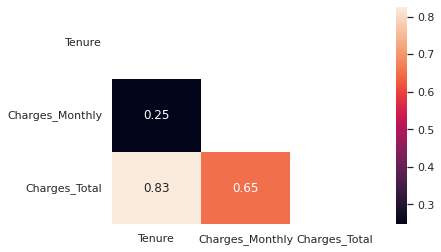

In [28]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot=True, mask=mask)

Observamos uma alta correlação do tempo de contrato do cliente com o gasto total.

Para as correlações de dados categóricos irei usar o módulo nominal da biblioteca [dython](https://github.com/shakedzy/dython) que realiza um cálculo de associações entre os dados categóricos para determinar a correlação.

In [29]:
# Irei utilizar a biblioteca dython para calcular correlações de dados categóricos. Logo será preciso instalá-la antes de executra o código.
#!pip install dython

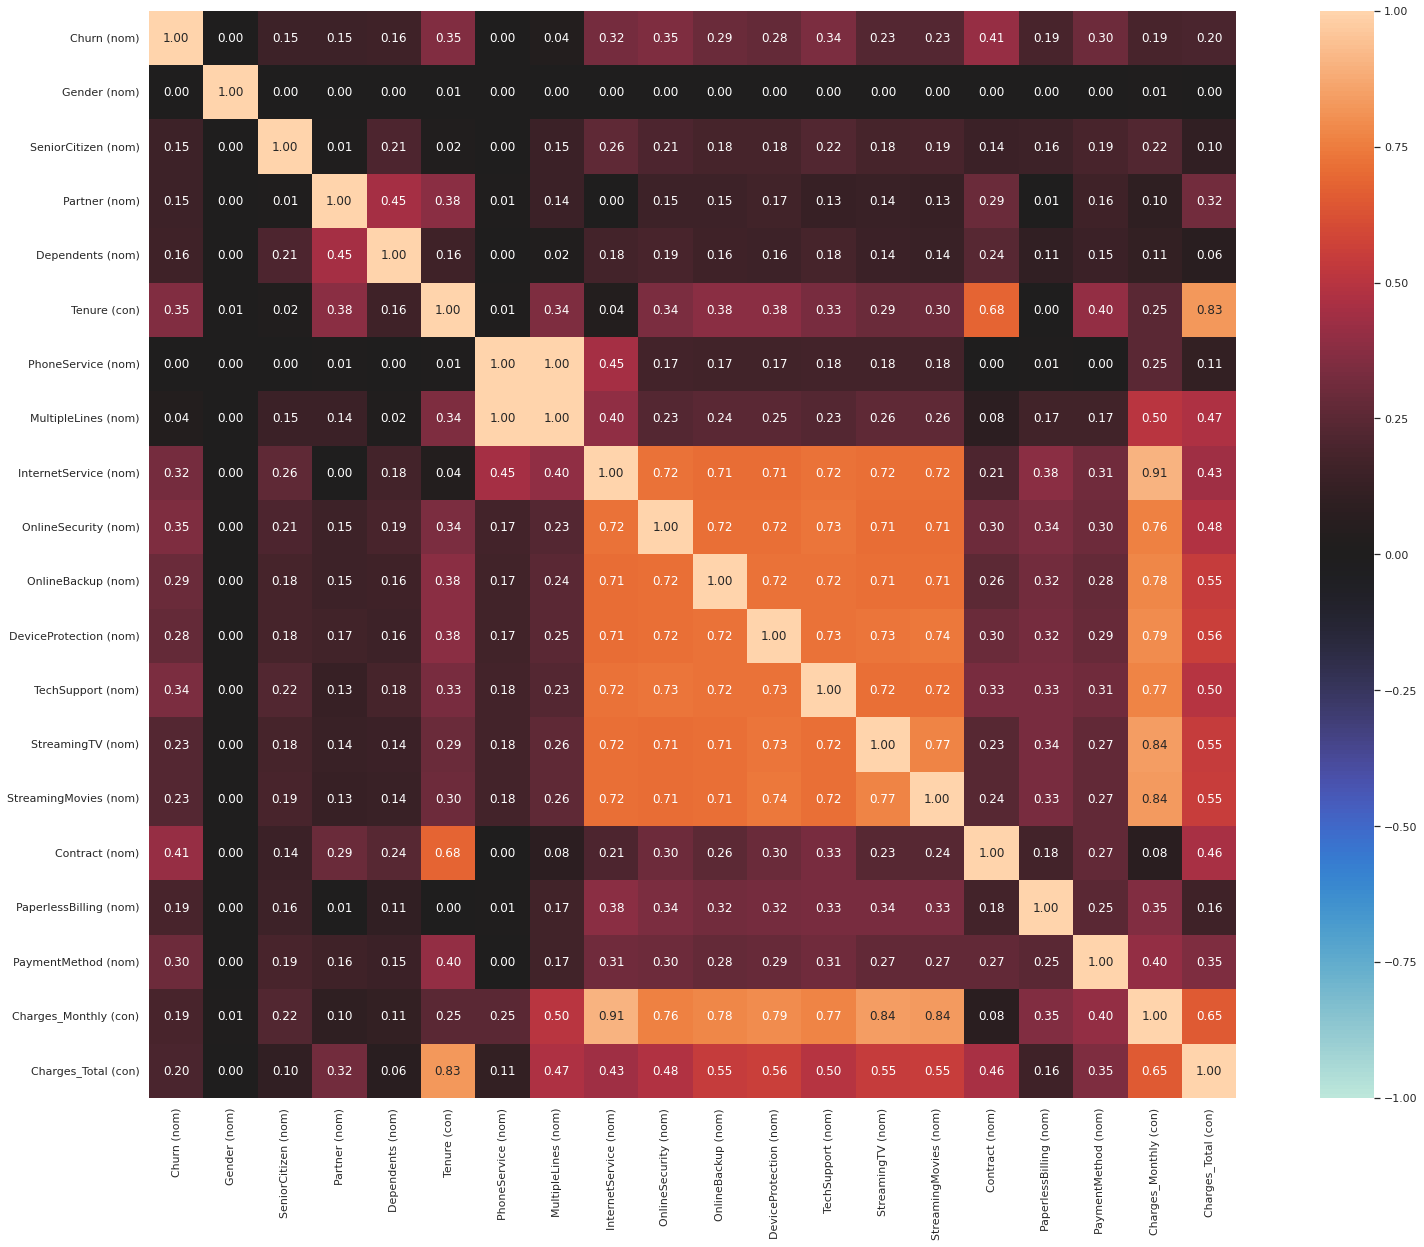

In [30]:
from dython import nominal

nominal.associations(dados.iloc[:, 1:],figsize=(30,20),mark_columns=True);

- Percebemos uma alta correlação entre os dados que compõem as informações de serviços de internet;

- A variável de churn possui correlações interessantes com as variáveis de: tempo de contrato, tipo de contrato, forma de pagamento, serviços de internet e segurança online e suporte técnico;

- O custo mensal do plano está altamente correlacionado com os pacotes adcionais de internet e segurança.

### **Visualizações dos dados com relação ao Churn**

O Churn indica se o cliente deixou ou não a empresa.

Iremos analisar primeiro os dados com base nos 4 grupos observados no dataset.

In [31]:
# Função auxiliar para marcar porcentagem nos plots
def porcentagem(ax, dados):
  total = float(len(dados))
  for p in ax.patches:
      percentage = f'{(p.get_height()/total)*100:.1f}%'
      x = p.get_x() + p.get_width()/2
      y = p.get_height()
      ax.text(x, y, percentage, fontsize=14, color='white', horizontalalignment='center', verticalalignment='top')

#### **Informações pessoais sobre o usuário e meses de contrato**

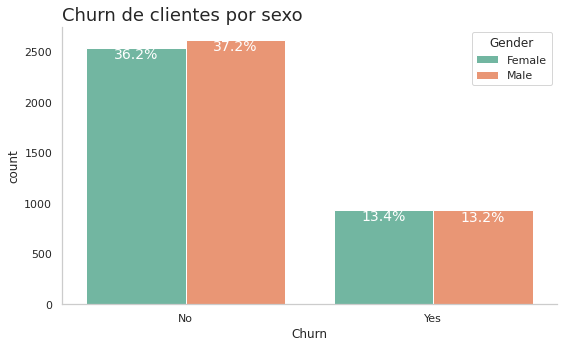

In [32]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.countplot(data=dados, x='Churn', hue='Gender')
ax.set_title('Churn de clientes por sexo', fontsize=18, loc='left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(False)

porcentagem(ax, dados)

plt.tight_layout()

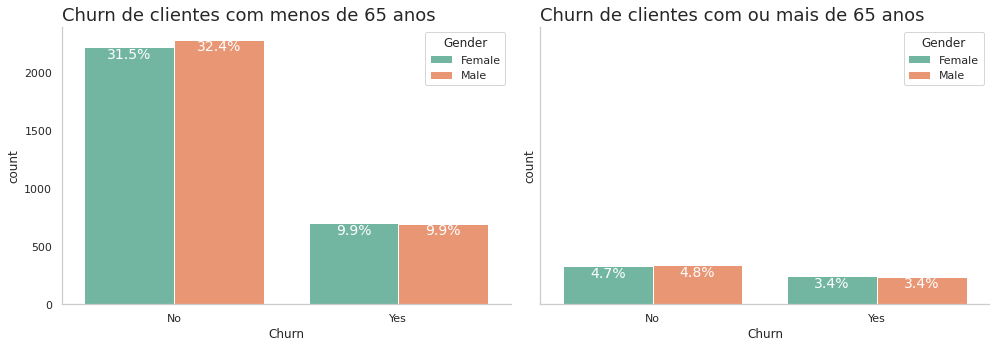

In [33]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(14,5), sharey=True)

ax0 = sns.countplot(data=dados[dados.SeniorCitizen == 'No'].sort_values(by='Gender'), x='Churn', hue='Gender', ax=ax0)
ax0.set_title('Churn de clientes com menos de 65 anos', fontsize=18, loc='left')
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.grid(False)
porcentagem(ax0, dados)

ax1 = sns.countplot(data=dados[dados.SeniorCitizen == 'Yes'].sort_values(by='Gender'), x='Churn', hue='Gender', ax=ax1)
ax1.set_title('Churn de clientes com ou mais de 65 anos', fontsize=18, loc='left')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(False)
porcentagem(ax1, dados)

plt.tight_layout()

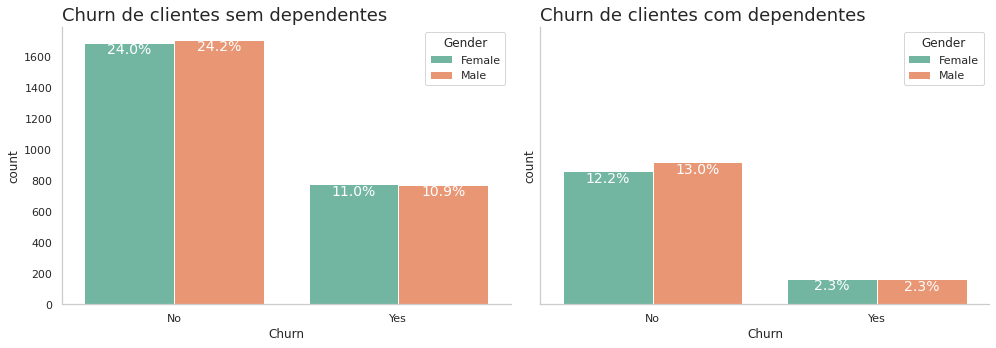

In [34]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(14,5), sharey=True)

ax0 = sns.countplot(data=dados[dados.Dependents == 'No'].sort_values(by='Gender'), x='Churn', hue='Gender', ax=ax0)
ax0.set_title('Churn de clientes sem dependentes', fontsize=18, loc='left')
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.grid(False)
porcentagem(ax0, dados)

ax1 = sns.countplot(data=dados[dados.Dependents == 'Yes'].sort_values(by='Gender'), x='Churn', hue='Gender', ax=ax1)
ax1.set_title('Churn de clientes com dependentes', fontsize=18, loc='left')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(False)
porcentagem(ax1, dados)

plt.tight_layout()

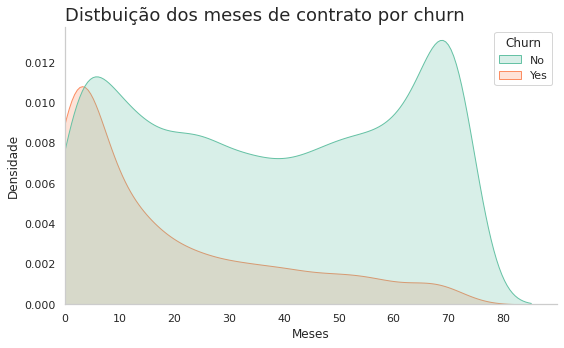

In [35]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.kdeplot(x=dados['Tenure'], data=dados, hue='Churn', fill=True, ax=ax)
ax.set_title('Distbuição dos meses de contrato por churn', fontsize=18, loc='left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Meses')
ax.set_ylabel('Densidade')
ax.set_xlim(xmin=0)

ax.grid(False)

plt.tight_layout()

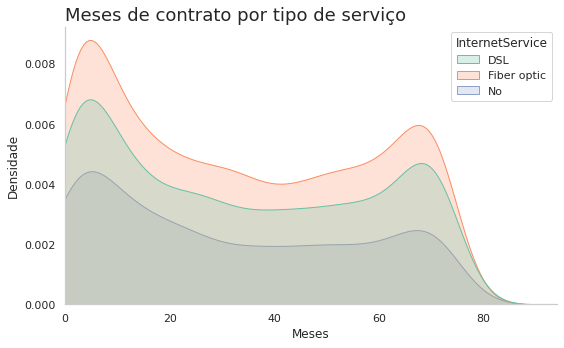

In [36]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.kdeplot(x=dados['Tenure'], data=dados, hue='InternetService', fill=True, ax=ax)
ax.set_title('Meses de contrato por tipo de serviço', fontsize=18, loc='left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Meses')
ax.set_ylabel('Densidade')
ax.set_xlim(xmin=0)

ax.grid(False)

plt.tight_layout()

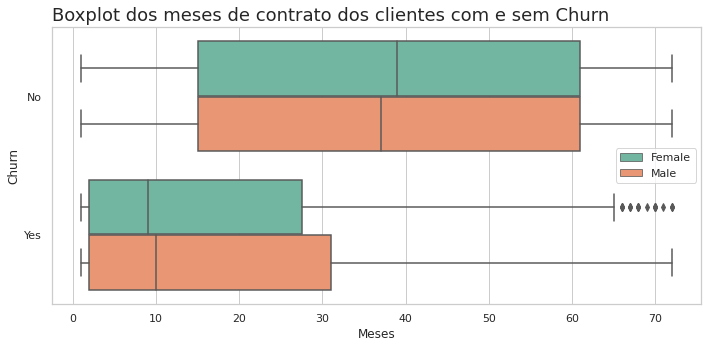

In [37]:
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.boxplot(data=dados, y='Churn', x='Tenure', hue='Gender', ax=ax)
ax.set_title('Boxplot dos meses de contrato dos clientes com e sem Churn', fontsize=18, loc='left')
ax.legend(loc='best')
ax.set_xlabel('Meses')

plt.tight_layout()

Com as primeiras análises, podemos perceber que:

- **Não há muita diferença em relação ao sexo para definir se um usuário irá cancelar o plano**;

- **Clientes com menos de 65 anos tendem a ter uma taxa de Churn 3x maior com relação aos clientes mais velhos, aproximadamente**;

- **Clientes sem dependentes possuem uma taxa de Churn 4.5x maior do que clientes com dependentes, aproximadamente**;

- **O churn ocorre com mais frequência em clientes com pouco tempo de plano, em torno de 10 a 20 meses de contrato**.

#### **Informações do cliente sobre assinatura do serviço telefônico**

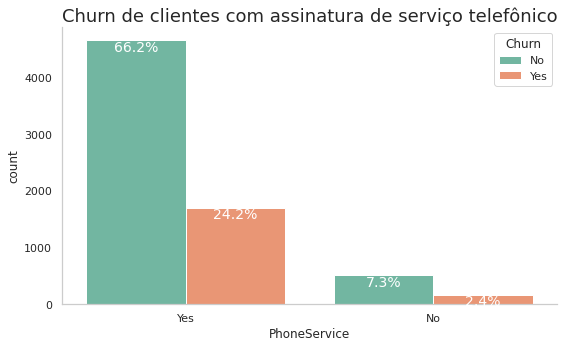

In [38]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.countplot(data=dados, x='PhoneService', hue='Churn')
ax.set_title('Churn de clientes com assinatura de serviço telefônico', fontsize=18, loc='left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(False)

porcentagem(ax, dados)

plt.tight_layout()

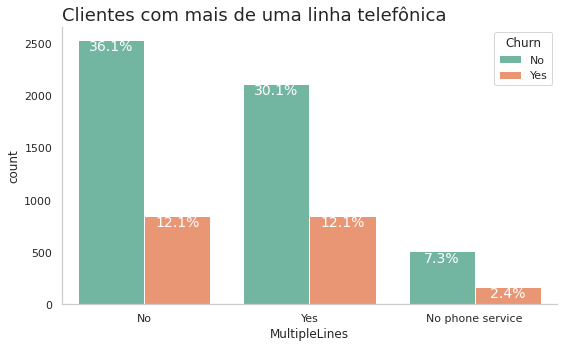

In [39]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.countplot(data=dados, x='MultipleLines', hue='Churn')
ax.set_title('Clientes com mais de uma linha telefônica', fontsize=18, loc='left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(False)

porcentagem(ax, dados)

plt.tight_layout()

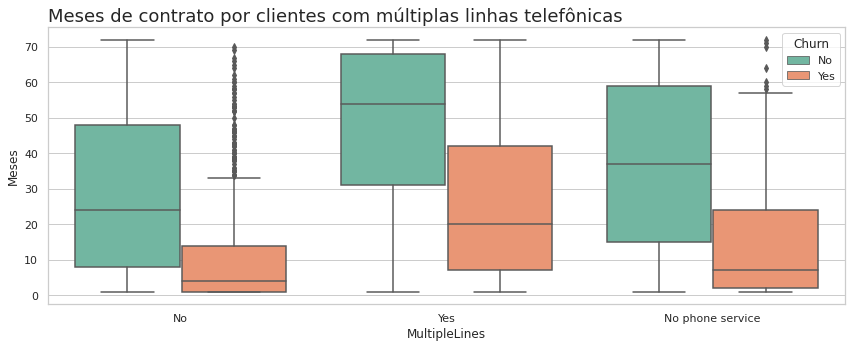

In [40]:
fig, ax = plt.subplots(figsize=(12,5))

ax = sns.boxplot(data=dados, x='MultipleLines', y='Tenure', hue='Churn', ax=ax)
ax.set_title('Meses de contrato por clientes com múltiplas linhas telefônicas', fontsize=18, loc='left')
#ax.legend(loc='best')
ax.set_ylabel('Meses')

plt.tight_layout()

Com as análises acima, podemos perceber que:

- **A quantidade de clientes que cancelam o plano é praticamente igual para os clientes com uma ou mais linha telefônica**;

- **Clientes com mais de uma linha telefônica ficam com o contrato ativo por mais tempo, antes de cancelarem o plano**.

#### **Informações do cliente sobre serviços na assinatura de internet**

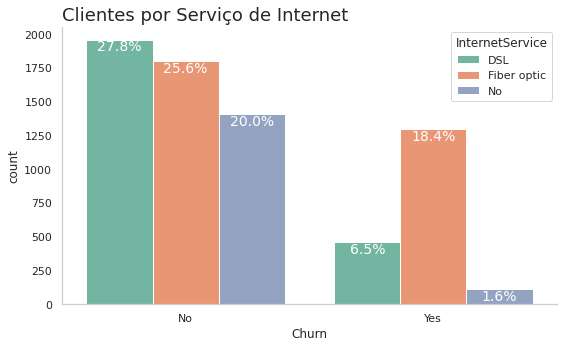

In [41]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.countplot(data=dados, x='Churn', hue='InternetService')
ax.set_title('Clientes por Serviço de Internet', fontsize=18, loc='left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(False)

porcentagem(ax, dados)

plt.tight_layout()

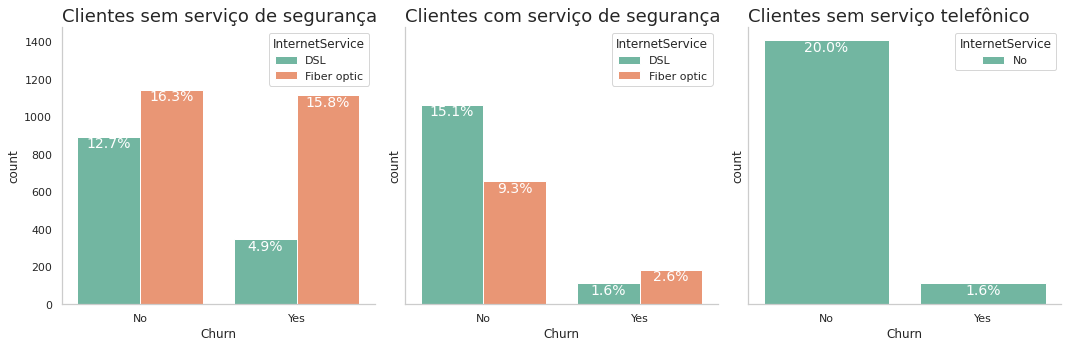

In [42]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True)

ax0 = sns.countplot(data=dados[dados.OnlineSecurity == 'No'].sort_values(by='InternetService'), x='Churn', hue='InternetService', ax=ax0)
ax0.set_title('Clientes sem serviço de segurança', fontsize=18, loc='left')
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.grid(False)
porcentagem(ax0, dados)

ax1 = sns.countplot(data=dados[dados.OnlineSecurity == 'Yes'].sort_values(by='InternetService'), x='Churn', hue='InternetService', ax=ax1)
ax1.set_title('Clientes com serviço de segurança', fontsize=18, loc='left')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(False)
porcentagem(ax1, dados)

ax2 = sns.countplot(data=dados[dados.OnlineSecurity == 'No internet service'].sort_values(by='InternetService'), x='Churn', hue='InternetService', ax=ax2)
ax2.set_title('Clientes sem serviço telefônico', fontsize=18, loc='left')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(False)
porcentagem(ax2, dados)

plt.tight_layout()

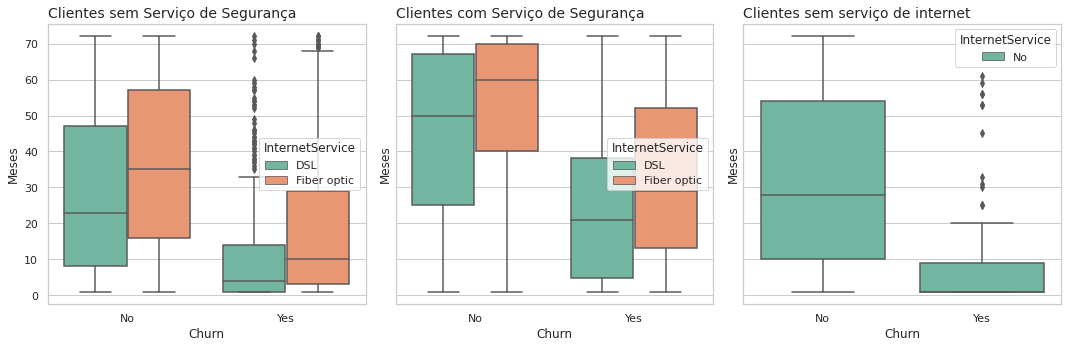

In [43]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True)

ax0 = sns.boxplot(data=dados[dados.OnlineSecurity == 'No'].sort_values(by='InternetService'), x='Churn', y='Tenure', hue='InternetService', ax=ax0)
ax0.set_title('Clientes sem Serviço de Segurança', fontsize=14, loc='left')
#ax0.legend(loc='best')
ax0.set_ylabel('Meses')


ax1 = sns.boxplot(data=dados[dados.OnlineSecurity == 'Yes'].sort_values(by='InternetService'), x='Churn', y='Tenure', hue='InternetService', ax=ax1)
ax1.set_title('Clientes com Serviço de Segurança', fontsize=14, loc='left')
#ax1.legend(loc='best')
ax1.set_ylabel('Meses')


ax2 = sns.boxplot(data=dados[dados.OnlineSecurity == 'No internet service'].sort_values(by='InternetService'), x='Churn', y='Tenure', hue='InternetService', ax=ax2)
ax2.set_title('Clientes sem serviço de internet', fontsize=14, loc='left')
#ax2.legend(loc='best')
ax2.set_ylabel('Meses')


plt.tight_layout()

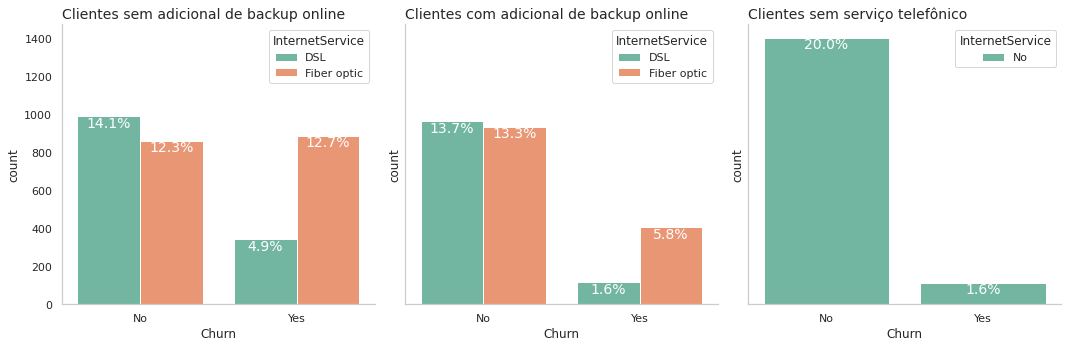

In [44]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True)

ax0 = sns.countplot(data=dados[dados.OnlineBackup == 'No'].sort_values(by='InternetService'), x='Churn', hue='InternetService', ax=ax0)
ax0.set_title('Clientes sem adicional de backup online', fontsize=14, loc='left')
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.grid(False)
porcentagem(ax0, dados)

ax1 = sns.countplot(data=dados[dados.OnlineBackup == 'Yes'].sort_values(by='InternetService'), x='Churn', hue='InternetService', ax=ax1)
ax1.set_title('Clientes com adicional de backup online', fontsize=14, loc='left')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(False)
porcentagem(ax1, dados)

ax2 = sns.countplot(data=dados[dados.OnlineBackup == 'No internet service'].sort_values(by='InternetService'), x='Churn', hue='InternetService', ax=ax2)
ax2.set_title('Clientes sem serviço telefônico', fontsize=14, loc='left')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(False)
porcentagem(ax2, dados)

plt.tight_layout()

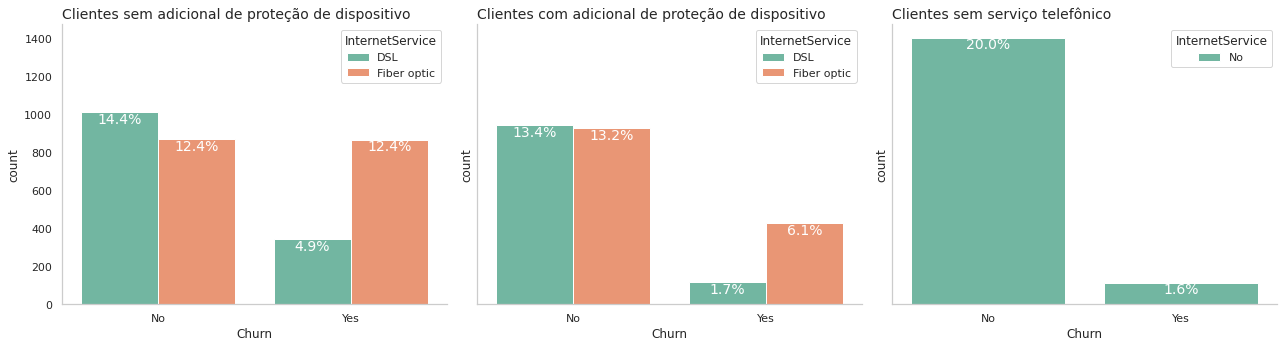

In [45]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(18,5), sharey=True)

ax0 = sns.countplot(data=dados[dados.DeviceProtection == 'No'].sort_values(by='InternetService'), x='Churn', hue='InternetService', ax=ax0)
ax0.set_title('Clientes sem adicional de proteção de dispositivo', fontsize=14, loc='left')
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.grid(False)
porcentagem(ax0, dados)

ax1 = sns.countplot(data=dados[dados.DeviceProtection == 'Yes'].sort_values(by='InternetService'), x='Churn', hue='InternetService', ax=ax1)
ax1.set_title('Clientes com adicional de proteção de dispositivo', fontsize=14, loc='left')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(False)
porcentagem(ax1, dados)

ax2 = sns.countplot(data=dados[dados.DeviceProtection == 'No internet service'].sort_values(by='InternetService'), x='Churn', hue='InternetService', ax=ax2)
ax2.set_title('Clientes sem serviço telefônico', fontsize=14, loc='left')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(False)
porcentagem(ax2, dados)

plt.tight_layout()

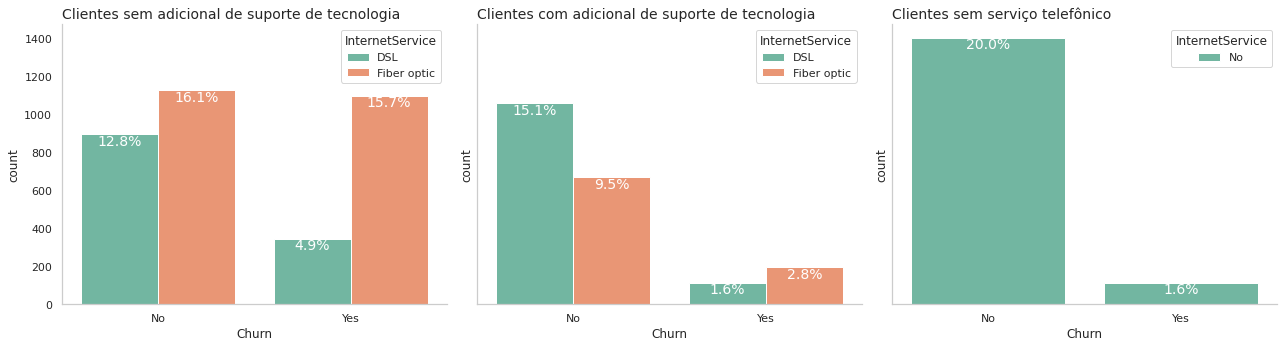

In [46]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(18,5), sharey=True)

ax0 = sns.countplot(data=dados[dados.TechSupport == 'No'].sort_values(by='InternetService'), x='Churn', hue='InternetService', ax=ax0)
ax0.set_title('Clientes sem adicional de suporte de tecnologia', fontsize=14, loc='left')
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.grid(False)
porcentagem(ax0, dados)

ax1 = sns.countplot(data=dados[dados.TechSupport == 'Yes'].sort_values(by='InternetService'), x='Churn', hue='InternetService', ax=ax1)
ax1.set_title('Clientes com adicional de suporte de tecnologia', fontsize=14, loc='left')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(False)
porcentagem(ax1, dados)

ax2 = sns.countplot(data=dados[dados.TechSupport == 'No internet service'].sort_values(by='InternetService'), x='Churn', hue='InternetService', ax=ax2)
ax2.set_title('Clientes sem serviço telefônico', fontsize=14, loc='left')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(False)
porcentagem(ax2, dados)

plt.tight_layout()

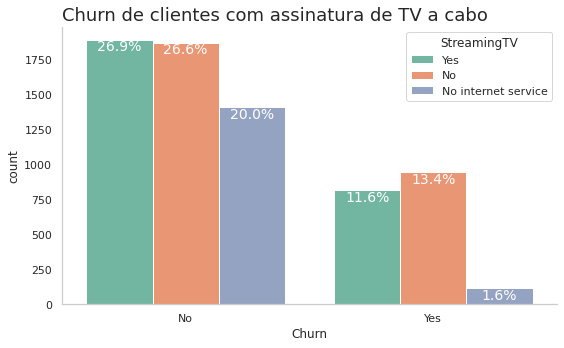

In [47]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.countplot(data=dados, x='Churn', hue='StreamingTV')
ax.set_title('Churn de clientes com assinatura de TV a cabo', fontsize=18, loc='left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(False)

porcentagem(ax, dados)

plt.tight_layout()

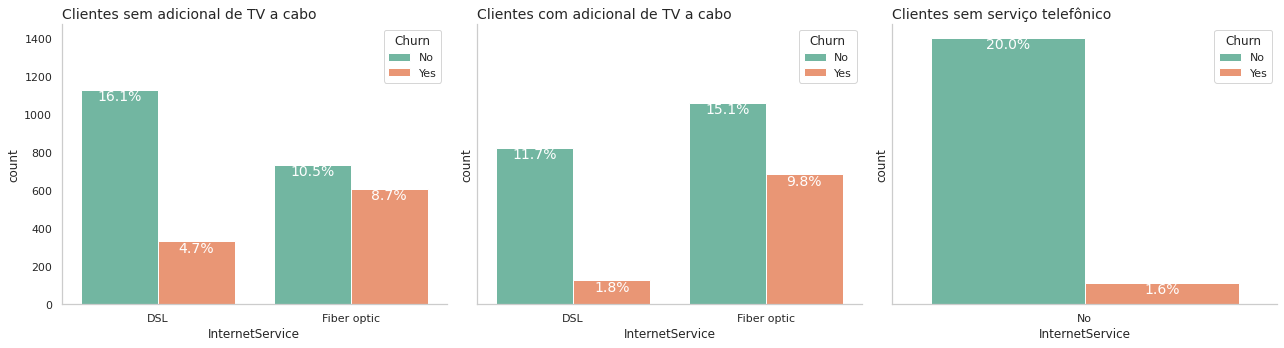

In [48]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(18,5), sharey=True)

ax0 = sns.countplot(data=dados[dados.StreamingTV == 'No'].sort_values(by='InternetService'), x='InternetService', hue='Churn', ax=ax0)
ax0.set_title('Clientes sem adicional de TV a cabo', fontsize=14, loc='left')
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.grid(False)
porcentagem(ax0, dados)

ax1 = sns.countplot(data=dados[dados.StreamingTV == 'Yes'].sort_values(by='InternetService'), x='InternetService', hue='Churn', ax=ax1)
ax1.set_title('Clientes com adicional de TV a cabo', fontsize=14, loc='left')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(False)
porcentagem(ax1, dados)

ax2 = sns.countplot(data=dados[dados.StreamingTV == 'No internet service'].sort_values(by='InternetService'), x='InternetService', hue='Churn', ax=ax2)
ax2.set_title('Clientes sem serviço telefônico', fontsize=14, loc='left')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(False)
porcentagem(ax2, dados)

plt.tight_layout()

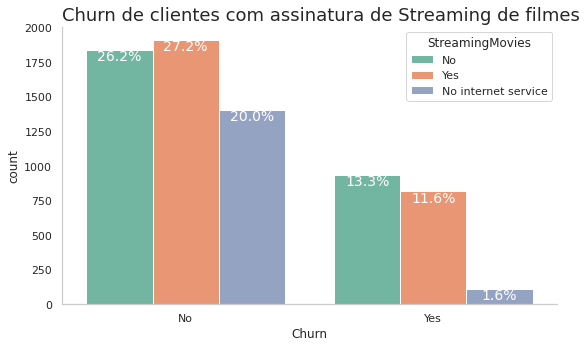

In [49]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.countplot(data=dados, x='Churn', hue='StreamingMovies')
ax.set_title('Churn de clientes com assinatura de Streaming de filmes', fontsize=18, loc='left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(False)

porcentagem(ax, dados)

plt.tight_layout()

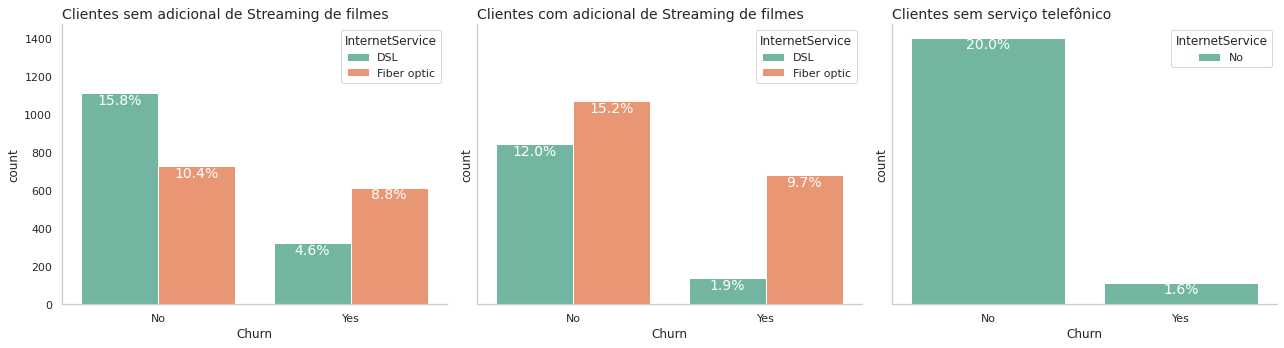

In [50]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(18,5), sharey=True)

ax0 = sns.countplot(data=dados[dados.StreamingMovies == 'No'].sort_values(by='InternetService'), x='Churn', hue='InternetService', ax=ax0)
ax0.set_title('Clientes sem adicional de Streaming de filmes', fontsize=14, loc='left')
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.grid(False)
porcentagem(ax0, dados)

ax1 = sns.countplot(data=dados[dados.StreamingMovies == 'Yes'].sort_values(by='InternetService'), x='Churn', hue='InternetService', ax=ax1)
ax1.set_title('Clientes com adicional de Streaming de filmes', fontsize=14, loc='left')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(False)
porcentagem(ax1, dados)

ax2 = sns.countplot(data=dados[dados.StreamingMovies == 'No internet service'].sort_values(by='InternetService'), x='Churn', hue='InternetService', ax=ax2)
ax2.set_title('Clientes sem serviço telefônico', fontsize=14, loc='left')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(False)
porcentagem(ax2, dados)

plt.tight_layout()

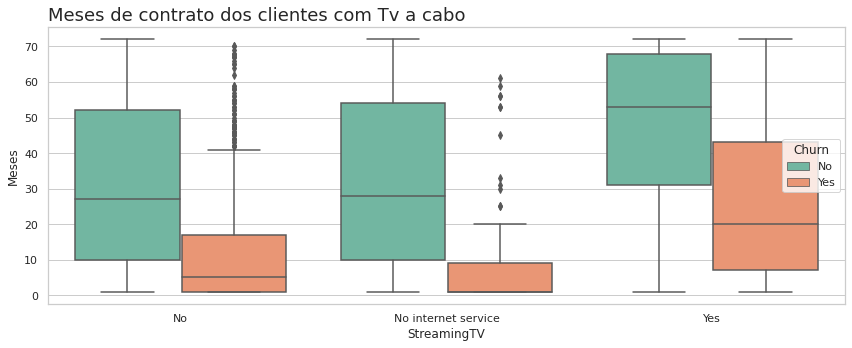

In [51]:
fig, ax = plt.subplots(figsize=(12,5))

ax = sns.boxplot(data=dados.sort_values(by='StreamingTV'), x='StreamingTV', y='Tenure', hue='Churn', ax=ax)
ax.set_title('Meses de contrato dos clientes com Tv a cabo', fontsize=18, loc='left')
#ax.legend(loc='best')
ax.set_ylabel('Meses')

plt.tight_layout()

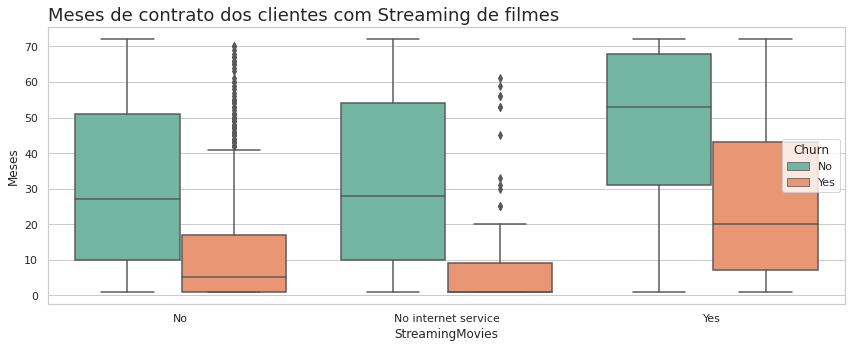

In [52]:
fig, ax = plt.subplots(figsize=(12,5))

ax = sns.boxplot(data=dados.sort_values(by='StreamingMovies'), x='StreamingMovies', y='Tenure', hue='Churn', ax=ax)
ax.set_title('Meses de contrato dos clientes com Streaming de filmes', fontsize=18, loc='left')
#ax.legend(loc='best')
ax.set_ylabel('Meses')

plt.tight_layout()

Com as análises acima, podemos perceber que:

- **Os clientes com serviço de fibra óptica tendem a cancelar mais o plano com a operadora**;

- **A maioria dos clientes não possuem serviços adicionais de segurança e suporte. Entre os clientes que possuem esses serviços a taxa de Churn é menor**;

- **O Churn é maior para os clientes que não possuem streaming de Tv e filmes;**

- **Clientes com planos de streaming ficam mais tempo com o plano ativo, se comparado com os clientes que não possuem serviço de streaming**;

#### **Informações do cliente sobre o contrato do usuário e gastos**

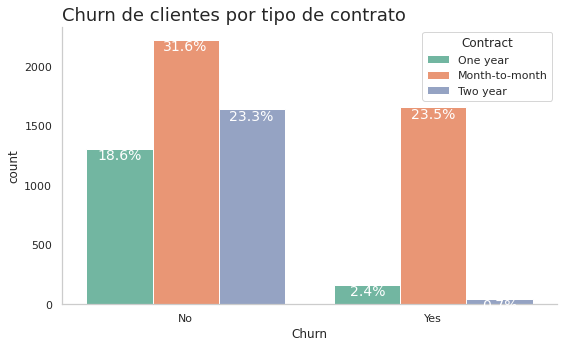

In [53]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.countplot(data=dados, x='Churn', hue='Contract')
ax.set_title('Churn de clientes por tipo de contrato', fontsize=18, loc='left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(False)

porcentagem(ax, dados)

plt.tight_layout()

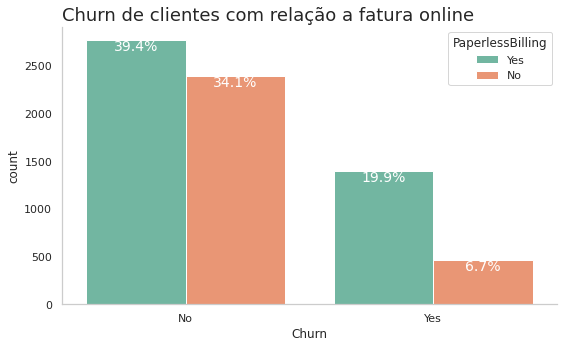

In [54]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.countplot(data=dados, x='Churn', hue='PaperlessBilling')
ax.set_title('Churn de clientes com relação a fatura online', fontsize=18, loc='left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(False)

porcentagem(ax, dados)

plt.tight_layout()

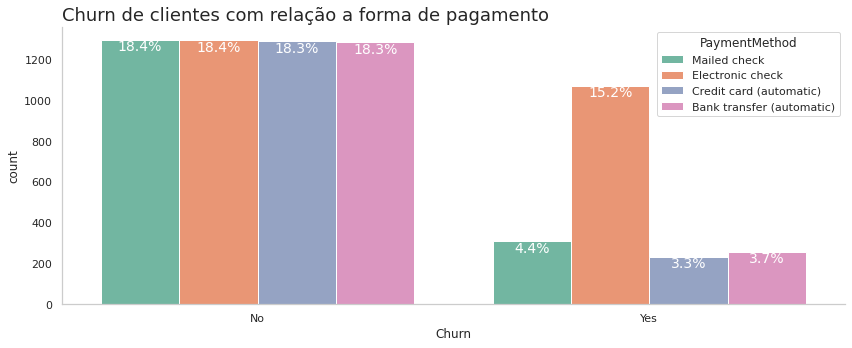

In [55]:
fig, ax = plt.subplots(figsize=(12,5))

ax = sns.countplot(data=dados, x='Churn', hue='PaymentMethod')
ax.set_title('Churn de clientes com relação a forma de pagamento', fontsize=18, loc='left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(False)

porcentagem(ax, dados)

plt.tight_layout()

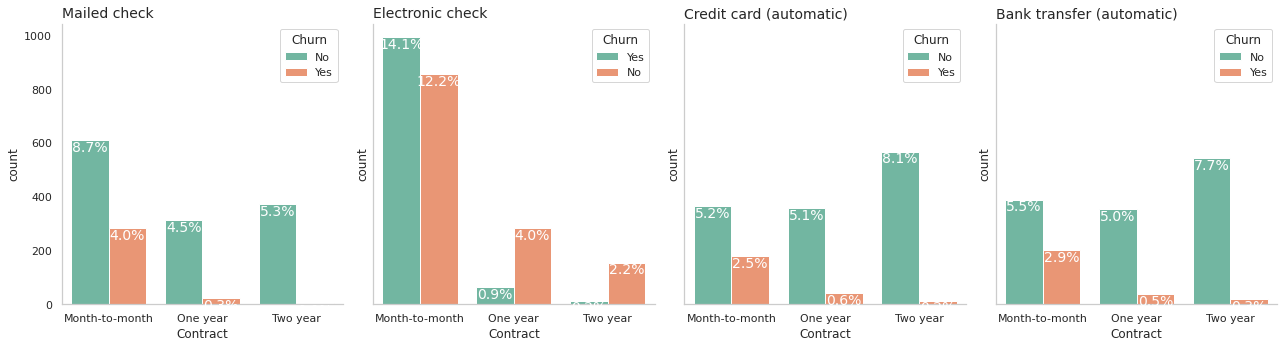

In [56]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(18,5), sharey=True)

ax0 = sns.countplot(data=dados[dados.PaymentMethod == 'Mailed check'].sort_values(by='Contract'), x='Contract', hue='Churn', ax=ax0)
ax0.set_title('Mailed check', fontsize=14, loc='left')
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.grid(False)
porcentagem(ax0, dados)

ax1 = sns.countplot(data=dados[dados.PaymentMethod == 'Electronic check'].sort_values(by='Contract'), x='Contract', hue='Churn', ax=ax1)
ax1.set_title('Electronic check', fontsize=14, loc='left')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(False)
porcentagem(ax1, dados)

ax2 = sns.countplot(data=dados[dados.PaymentMethod == 'Credit card (automatic)'].sort_values(by='Contract'), x='Contract', hue='Churn', ax=ax2)
ax2.set_title('Credit card (automatic)', fontsize=14, loc='left')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(False)
porcentagem(ax2, dados)

ax3 = sns.countplot(data=dados[dados.PaymentMethod == 'Bank transfer (automatic)'].sort_values(by='Contract'), x='Contract', hue='Churn', ax=ax3)
ax3.set_title('Bank transfer (automatic)', fontsize=14, loc='left')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(False)
porcentagem(ax3, dados)

plt.tight_layout()

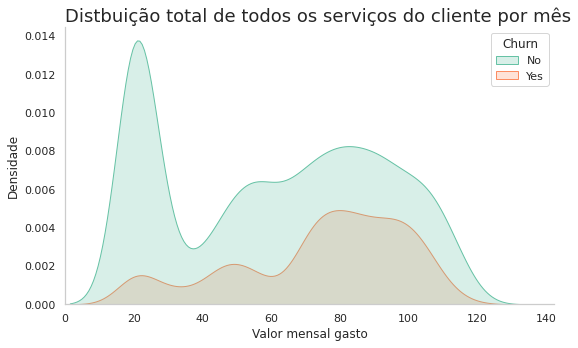

In [57]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.kdeplot(x=dados['Charges_Monthly'], data=dados, hue='Churn', fill=True, ax=ax)
ax.set_title('Distbuição total de todos os serviços do cliente por mês', fontsize=18, loc='left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Valor mensal gasto')
ax.set_ylabel('Densidade')
ax.set_xlim(xmin=0)

ax.grid(False)

plt.tight_layout()

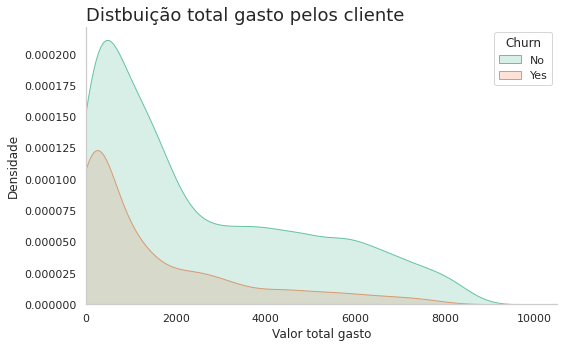

In [58]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.kdeplot(x=dados['Charges_Total'], data=dados, hue='Churn', fill=True, ax=ax)
ax.set_title('Distbuição total gasto pelos cliente', fontsize=18, loc='left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Valor total gasto')
ax.set_ylabel('Densidade')
ax.set_xlim(xmin=0)

ax.grid(False)

plt.tight_layout()

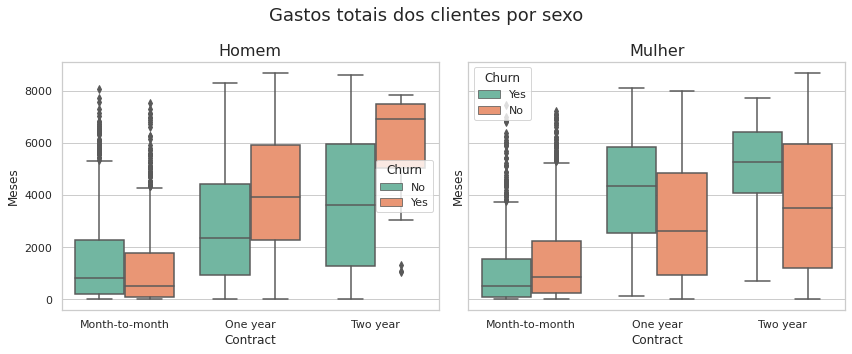

In [59]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharey=True)

plt.suptitle('Gastos totais dos clientes por sexo', fontsize=18)

ax0 = sns.boxplot(data=dados[dados.Gender == 'Male'].sort_values(by='StreamingTV'), x='Contract', y='Charges_Total', hue='Churn', ax=ax0)
ax0.set_title('Homem', fontsize=16, loc='center')
#ax.legend(loc='best')
ax0.set_ylabel('Meses')

ax1 = sns.boxplot(data=dados[dados.Gender == 'Female'].sort_values(by='StreamingTV'), x='Contract', y='Charges_Total', hue='Churn', ax=ax1)
ax1.set_title('Mulher', fontsize=16, loc='center')
#ax.legend(loc='best')
ax1.set_ylabel('Meses')

plt.tight_layout()

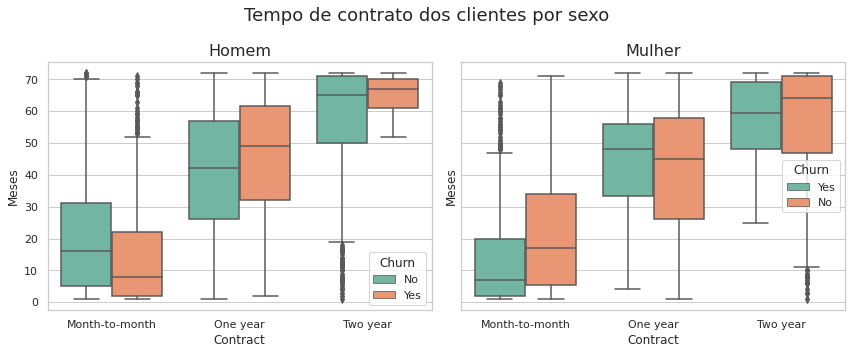

In [60]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharey=True)

plt.suptitle('Tempo de contrato dos clientes por sexo', fontsize=18)

ax0 = sns.boxplot(data=dados[dados.Gender == 'Male'].sort_values(by='StreamingTV'), x='Contract', y='Tenure', hue='Churn', ax=ax0)
ax0.set_title('Homem', fontsize=16, loc='center')
#ax.legend(loc='best')
ax0.set_ylabel('Meses')

ax1 = sns.boxplot(data=dados[dados.Gender == 'Female'].sort_values(by='StreamingTV'), x='Contract', y='Tenure', hue='Churn', ax=ax1)
ax1.set_title('Mulher', fontsize=16, loc='center')
#ax.legend(loc='best')
ax1.set_ylabel('Meses')

plt.tight_layout()

Com as análises acima, podemos perceber que:

- **Clientes que pagam por mês são a maioria e são eles que possuem a maior taxa de churn**;

- **A maioria dos clientes pagam online, sendo a categoria com maior taxa de churn**;

- **O tipo de pagamento com maior taxa de churn é dos clientes que pagam por meio de cheque eletrônico**;

- **A medida que os clientes gastam com a operadora no total, menor a taxa de churn**;

- **A maioria dos clientes com churn tem um gasto mensal entre 70 e 100 reais**;

- **Homens e mulheres parecem ter o mesmo perfil de tempo e tipo de contrato**;

## **3. Preparação dos Dados**

In [61]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   Gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   object 
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   Tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


In [62]:
dados.head()

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [63]:
dados.describe()

,Tenure,Charges_Monthly,Charges_Total
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Agora, irei reordenar as colunas para deixar as colunas tipo int64 e float64 por último e facilitar meu encoding.

In [64]:
# Pegando os nomes das colunas
columns_names = dados.columns
print(columns_names)

Index(['customerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly',
       'Charges_Total'],
      dtype='object')


In [65]:
# Reordenando
dados = dados[['customerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'Charges_Monthly',
       'Charges_Total']]
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   Gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   object 
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Analisando a variável target Churn para ver o desbalanceamento.

In [66]:
print(f'{dados["Churn"].value_counts()["Yes"]/len(dados)*100:.2f}% dos clientes deixaram a empresa.')
print(f'{dados["Churn"].value_counts()["No"]/len(dados)*100:.2f}% dos clientes permanecem na empresa.')

26.58% dos clientes deixaram a empresa.
73.42% dos clientes permanecem na empresa.


### **Encoding dos dados**

Irei trabalhar primeiro no encoding dos dados para configurar as variáveis categóricas.

In [67]:
# Separando a entrada
X = dados.iloc[:, 2:]
X.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Tenure,Charges_Monthly,Charges_Total
0,Female,No,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,9,65.6,593.30
1,Male,No,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,9,59.9,542.40
2,Male,No,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,4,73.9,280.85
3,Male,Yes,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,13,98.0,1237.85
4,Female,Yes,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,3,83.9,267.40


In [68]:
# Separando o target
y = dados.iloc[:, 1]
y.head()

0     No
1     No
2    Yes
3    Yes
4    Yes
Name: Churn, dtype: object

### **Avaliações com os dados desbalanceados**

In [69]:
# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, shuffle=True)

Separei os dados com 15% para teste, pois irei usar validação cruzada. logo os dados de teste serão utilizados no teste final de cada análise.

In [70]:
print(f'Shape do X_train: {X_train.shape}')
print(f'Shape do y_train: {y_train.shape}')
print(f'Shape do X_test: {X_test.shape}')
print(f'Shape do y_test: {y_test.shape}')

Shape do X_train: (5977, 19)
Shape do y_train: (5977,)
Shape do X_test: (1055, 19)
Shape do y_test: (1055,)


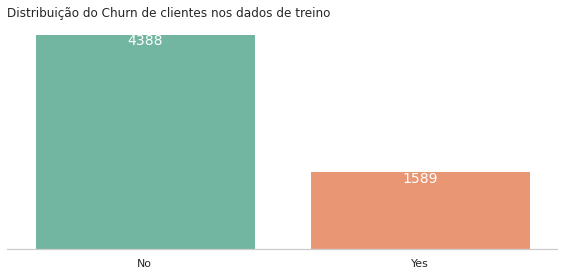

In [71]:
# Plot para ver balanceamento dos dados

fig, ax = plt.subplots(figsize=(8,4))

ax = sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts(), ax=ax)
ax.set_title('Distribuição do Churn de clientes nos dados de treino', fontsize=12, loc='left')
ax.set_ylabel('').set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft = False)

for i in range(y_train.unique().shape[0]):
  valor_y = y_train.value_counts()
  ax.text(i, valor_y[i], valor_y[i], fontsize=14, color='white', horizontalalignment='center', verticalalignment='top')

ax.grid(False)
plt.tight_layout()

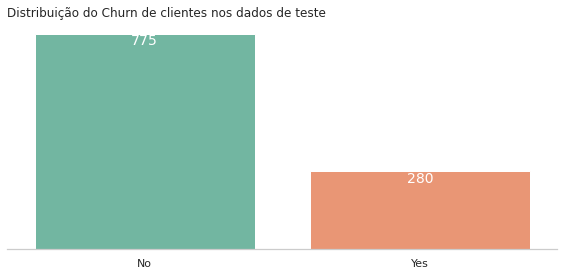

In [72]:
# Plot para ver balanceamento dos dados

fig, ax = plt.subplots(figsize=(8,4))

ax = sns.barplot(x=y_test.value_counts().index, y=y_test.value_counts(), ax=ax)
ax.set_title('Distribuição do Churn de clientes nos dados de teste', fontsize=12, loc='left')
ax.set_ylabel('').set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft = False)

for i in range(y_test.unique().shape[0]):
  valor_y = y_test.value_counts()
  ax.text(i, valor_y[i], valor_y[i], fontsize=14, color='white', horizontalalignment='center', verticalalignment='top')

ax.grid(False)
plt.tight_layout()

Agora é preciso realizar os encoding dos dados.

Vou usar o [One Hoting Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) e [LabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html#sklearn.preprocessing.LabelBinarizer) do Sklearn, pois consigo transformar os dados categóricos em uma matriz numérica e mapear a mesma representação para os dados de teste.

In [73]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

In [74]:
# Criando o encoder com drop=if_binary, para reduzir a quantidade total de colunas no hot_encoder
X_enc = OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore', dtype=int)
X_enc.fit(X_train.iloc[:, :-3])

OneHotEncoder(drop='if_binary', dtype=<class 'int'>, handle_unknown='ignore',
              sparse=False)

In [75]:
# Categorias codificadas
X_enc.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

In [76]:
# Nomes das novas características que serão mapeadas paras as colunas
X_enc_names = X_enc.get_feature_names_out()
X_enc_names

array(['Gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automa

In [77]:
# Mapeando as colunas codificadas para o X
X_train_enc = pd.DataFrame(X_enc.transform(X_train.iloc[:, :-3]), columns=X_enc_names)
X_train_enc

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,1,0,0,1,0,1,...,0,1,1,0,0,0,0,0,1,0
1,0,0,0,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
2,1,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,0,0,1,0,0,1,0,1,...,0,1,1,0,0,1,0,0,1,0
4,1,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5972,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5973,0,0,0,0,1,0,0,1,0,1,...,0,1,0,0,1,1,1,0,0,0
5974,1,0,0,0,1,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
5975,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [78]:
# Adicionando as colunas numéricas
for column in X_train.columns[-3:]:
  X_train_enc[column] = X_train[column].to_numpy()

X_train_enc

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure,Charges_Monthly,Charges_Total
0,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,13,100.75,1313.25
1,0,0,0,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,17,83.55,1329.15
2,1,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,1,16,49.45,799.00
3,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,30,100.20,2983.80
4,1,0,1,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,70,25.15,1940.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5972,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,3,75.50,220.60
5973,0,0,0,0,1,0,0,1,0,1,...,0,1,1,1,0,0,0,72,111.60,8012.75
5974,1,0,0,0,1,1,0,0,0,0,...,0,1,0,0,1,0,0,27,20.35,531.60
5975,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,1,45.80,45.80


In [79]:
# Realizando o processo para X_test
X_test_enc = pd.DataFrame(X_enc.transform(X_test.iloc[:, :-3]), columns=X_enc_names)

for column in X_test.columns[-3:]:
  X_test_enc[column] = X_test[column].to_numpy()

X_test_enc

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure,Charges_Monthly,Charges_Total
0,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,1,0,15,86.20,1270.20
1,1,1,0,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,10,95.35,898.35
2,0,0,0,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,14,86.30,1180.95
3,1,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,24.80,24.80
4,0,0,1,0,1,0,0,1,0,1,...,0,1,0,0,0,0,1,62,113.95,6891.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0,0,0,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,1,70.70,70.70
1051,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,19.45,19.45
1052,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,1,0,0,20,19.60,356.15
1053,1,1,0,0,1,1,0,0,1,0,...,1,0,0,0,1,0,0,45,62.70,2791.50


In [80]:
# Criando o encoding para y: [No -> 0] [Yes -> 1]
lb = LabelBinarizer()

In [81]:
# Encoding do y_train
y_train_enc = lb.fit_transform(y_train)
y_train_enc

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [82]:
# Nomes das classes
lb_names = lb.classes_
lb_names

array(['No', 'Yes'], dtype='<U3')

In [83]:
# Encoding do y_test
y_test_enc = lb.transform(y_test)
y_test_enc

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]])

Com os dados separados podemos passar para a etapda de modelagem

## **4. Modelagem**

In [84]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

### **Definindo um baseline**

Vou criar um modelo base com o dummy classifier para ter uma base de comparação.

In [85]:
# Modelo dummy com estratégia de predição estratificada por classe
dummy_churn = DummyClassifier(strategy='stratified')

In [86]:
# Criando um pipeline para as transformações serem executadas sem leakage na validação cruzada
pipe_dummy = Pipeline([('MinMaxScaler', MinMaxScaler()), ('dummy', dummy_churn)])

In [87]:
# Realizando a validação cruzada
dummy_churn_cv = cross_validate(pipe_dummy, X_train_enc, y_train_enc, cv=5,
                                scoring=['accuracy', 'recall', 'precision', 'f1_weighted'], return_estimator=True)

dummy_churn_cv

{'fit_time': array([0.01728725, 0.00814176, 0.00862527, 0.00911427, 0.00810409]),
 'score_time': array([0.00687099, 0.00667262, 0.01091409, 0.00664139, 0.00641322]),
 'estimator': [Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                  ('dummy', DummyClassifier(strategy='stratified'))]),
  Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                  ('dummy', DummyClassifier(strategy='stratified'))]),
  Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                  ('dummy', DummyClassifier(strategy='stratified'))]),
  Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                  ('dummy', DummyClassifier(strategy='stratified'))]),
  Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                  ('dummy', DummyClassifier(strategy='stratified'))])],
 'test_accuracy': array([0.61371237, 0.61454849, 0.61004184, 0.6041841 , 0.60753138]),
 'test_recall': array([0.31446541, 0.25157233, 0.2807571 , 0.28616352, 0.26100629]),
 'test_precision': array([0.29069

In [88]:
print(f'Acurácia média: {dummy_churn_cv["test_accuracy"].mean():.2f}')
print(f'Precisão média: {dummy_churn_cv["test_precision"].mean():.2f}')
print(f'Revocação média: {dummy_churn_cv["test_recall"].mean():.2f}')
print(f'F1-Score médio: {dummy_churn_cv["test_f1_weighted"].mean():.2f}')

Acurácia média: 0.61
Precisão média: 0.27
Revocação média: 0.28
F1-Score médio: 0.61


Com o resultado da validação cruzada temos observações interessantes sobre o modelo.

Percebemos que há uma acurácia média de 61%, com revocação e precisão muito baixa, em torno de 27% para a classe positiva. Podemos perceber também que há um desbalanço nos resultados, pois o F1-Score é de 61%.

A seguir, irei prever os dados de testes com um dos modelos para ver se o mesmo padrão acontece e validar a análise anterior do desbalanço.

In [89]:
# Verificar o modelo com o pipeline
dummy_churn_cv['estimator'][0]

Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                ('dummy', DummyClassifier(strategy='stratified'))])

In [90]:
# Predict do modelo dummy 0
y_pred_cv = dummy_churn_cv['estimator'][0].predict(X_test_enc)

In [91]:
# Score do modelo dummy 0
dummy_churn_cv['estimator'][0].score(X_test_enc, y_test_enc)

0.6123222748815166

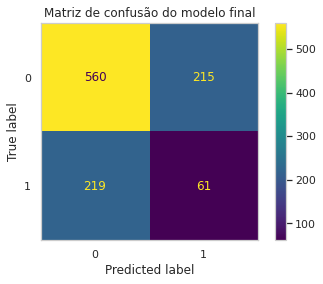

In [92]:
# Mostrar a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_enc, y_pred_cv)

cm_disp = ConfusionMatrixDisplay(cm, display_labels=dummy_churn_cv['estimator'][0].classes_)

cm_disp.plot()

plt.title('Matriz de confusão do modelo final')
plt.grid(False)

plt.show()

**61%** de acurácia.

Vamos ver o report de classificação que nos dá as métricas de **revocação**, **precisão** e **f1-score**.

In [94]:
predict_report = classification_report(y_test_enc, y_pred_cv, output_dict=True)
print(classification_report(y_test_enc, y_pred_cv, output_dict=False))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       775
           1       0.22      0.22      0.22       280

    accuracy                           0.59      1055
   macro avg       0.47      0.47      0.47      1055
weighted avg       0.59      0.59      0.59      1055



É possível ver que o modelo é muito ruim em predizer a classe de positiva, churn = Yes, com um recall de **22%**. Mas possui um recall de **72%** para a classe ne gativa, churn = No.

Como há muito mais dado da classe negativa, olhar apenas o resultado final de acurácia não nos ajuda muito, pois ele é um valor que nos engana.

O padrão se parece com o resultado da validação cruzada, há um desbalanço entre os resultados. Como queremos os cliente que abandonam o plano, ou seja, a classe positiva, o resultado não é bom.

### **Criando os modelos para os dados desbalanceados**

Vou constuir uma função para treino com validação cruzada e disposição de informações para o usuário. Irei avaliar as métricas de precisão, recall e f1-score macro para as duas classes.

Os modelos escolhidos para avaliação são: SVC, Random Forest e XGBoost.

In [95]:
def validacao_cruzada(modelo, nome, X_cv, y_cv, cv):

  warnings.filterwarnings('ignore')

  modelo_cv = cross_validate(modelo, X_cv, y_cv, cv=cv, scoring=['accuracy', 'recall', 'precision', 'f1_macro', 'roc_auc'], return_estimator=True)

  print('*****************************************************************************')
  print(f'*      Resultados do treino com validação cruzada para o {nome}')
  print('*****************************************************************************')
  print(f'* Acurácia: {modelo_cv["test_accuracy"]}')
  print(f'* Acurácia média: {modelo_cv["test_accuracy"].mean():.2f}')
  print('*-----------------------------------------------------------------------------')
  print(f'* Precisão: {modelo_cv["test_precision"]}')
  print(f'* Precisão média: {modelo_cv["test_precision"].mean():.2f}')
  print('*-----------------------------------------------------------------------------')
  print(f'* Revocação: {modelo_cv["test_recall"]}')
  print(f'* Revocação média: {modelo_cv["test_recall"].mean():.2f}')
  print('*-----------------------------------------------------------------------------')
  print(f'* F1_Score: {modelo_cv["test_f1_macro"]}')
  print(f'* F1_Score médio: {modelo_cv["test_f1_macro"].mean():.2f}')
  print('*-----------------------------------------------------------------------------')
  print(f'* ROC AUC: {modelo_cv["test_roc_auc"]}')
  print(f'* ROC AUC médio: {modelo_cv["test_roc_auc"].mean():.2f}')
  print('*****************************************************************************')

  return modelo_cv

In [96]:
# Importando o SVC e criando o modelo
from sklearn.svm import SVC

pipe_SVC = Pipeline([('MinMaxScaler', MinMaxScaler()), ('svc', SVC())])

# treinando o modelo com a função criada
modelo_svc = validacao_cruzada(pipe_SVC, 'SVC', X_train_enc, y_train_enc.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o SVC
*****************************************************************************
* Acurácia: [0.80351171 0.81772575 0.79748954 0.79665272 0.79246862]
* Acurácia média: 0.80
*-----------------------------------------------------------------------------
* Precisão: [0.6627451  0.70661157 0.67772512 0.66233766 0.64344262]
* Precisão média: 0.67
*-----------------------------------------------------------------------------
* Revocação: [0.53144654 0.53773585 0.4511041  0.48113208 0.49371069]
* Revocação média: 0.50
*-----------------------------------------------------------------------------
* F1_Score: [0.73034299 0.74585933 0.70584945 0.71269178 0.71152573]
* F1_Score médio: 0.72
*-----------------------------------------------------------------------------
* ROC AUC: [0.79353089 0.80751171 0.78225175 0.80154615 0.78579061]
* ROC AUC médio: 0.79
*******

**Pode ser verificado que o SVC não performa bem com os dados desbalanceados. A revocação e precisão da classe positiva não estão boas. O desequilíbrio nos resultados permanece entre as classes.**

In [97]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
#RF = RandomForestClassifier()

pipe_RF = Pipeline([('MinMaxScaler', MinMaxScaler()), ('RF', RandomForestClassifier())])

modelo_RF = validacao_cruzada(pipe_RF, 'RF', X_train_enc, y_train_enc.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o RF
*****************************************************************************
* Acurácia: [0.77759197 0.80016722 0.79497908 0.7790795  0.78828452]
* Acurácia média: 0.79
*-----------------------------------------------------------------------------
* Precisão: [0.59848485 0.67099567 0.64634146 0.61538462 0.62948207]
* Precisão média: 0.63
*-----------------------------------------------------------------------------
* Revocação: [0.49685535 0.48742138 0.50157729 0.45283019 0.49685535]
* Revocação média: 0.49
*-----------------------------------------------------------------------------
* F1_Score: [0.697997   0.71749158 0.71536582 0.68905237 0.70821281]
* F1_Score médio: 0.71
*-----------------------------------------------------------------------------
* ROC AUC: [0.80892287 0.82870052 0.81479632 0.82558285 0.8204087 ]
* ROC AUC médio: 0.82
********

**O Random Forest apresenta um resultado de F1-Score médio de 0.71 e revocação 0.49 para a classe positiva, ou seja, ainda há um desequilíbrio nos resultados.**

In [98]:
import xgboost as xgb

pipe_XGB = Pipeline([('MinMaxScaler', MinMaxScaler()), ('XGB', xgb.XGBClassifier())])

modelo_XGB = validacao_cruzada(pipe_XGB, 'XGB', X_train_enc, y_train_enc.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o XGB
*****************************************************************************
* Acurácia: [0.80769231 0.80183946 0.81171548 0.80167364 0.80083682]
* Acurácia média: 0.80
*-----------------------------------------------------------------------------
* Precisão: [0.66176471 0.66135458 0.69491525 0.6626506  0.65625   ]
* Precisão média: 0.67
*-----------------------------------------------------------------------------
* Revocação: [0.56603774 0.52201258 0.51735016 0.51886792 0.52830189]
* Revocação média: 0.53
*-----------------------------------------------------------------------------
* F1_Score: [0.74126677 0.72673715 0.73532304 0.72600255 0.72715429]
* F1_Score médio: 0.73
*-----------------------------------------------------------------------------
* ROC AUC: [0.83799838 0.8570436  0.84339048 0.85279828 0.84654482]
* ROC AUC médio: 0.85
*******

**O XGBoost apresenta um resultado de F1-Score médio de 0.73 e revocação 0.53 para a classe positiva, ou seja, ainda há um desequilíbrio nos resultados mas com uma leve melhora no resultado geral.**

### **Avaliações com os dados balanceados**

Agora irei testar as opções de balanceamento de dados para os treinar os modelos.

Com a biblioteca [imblearn](https://imbalanced-learn.org/stable/) testarei 2 opções de balanceamento, uma opção de under sampling e outra de over sampling:

1. Random under-sampling
2. SMOTE

#### **Balanceamento com Random Under Sampling**

In [99]:
# Balanceamento dos dados
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_train_rus, y_train_rus = rus.fit_resample(X_train_enc, y_train_enc)

print(f'Shape do X_train com Under Sampling: {X_train_rus.shape}')
print(f'Shape do y_train com Under Sampling: {y_train_rus.shape}')

print(f'Valores únicos das classes: {np.unique(y_train_rus, return_counts=True)}')

Shape do X_train com Under Sampling: (3178, 40)
Shape do y_train com Under Sampling: (3178,)
Valores únicos das classes: (array([0, 1]), array([1589, 1589]))


In [100]:
# Pipe do modelo SVC
modelo_svc_rus = validacao_cruzada(pipe_SVC, 'SVC', X_train_rus, y_train_rus.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o SVC
*****************************************************************************
* Acurácia: [0.75786164 0.74528302 0.73899371 0.7511811  0.7480315 ]
* Acurácia média: 0.75
*-----------------------------------------------------------------------------
* Precisão: [0.73428571 0.73353293 0.72352941 0.73313783 0.73099415]
* Precisão média: 0.73
*-----------------------------------------------------------------------------
* Revocação: [0.8081761  0.77044025 0.77358491 0.78864353 0.78616352]
* Revocação média: 0.79
*-----------------------------------------------------------------------------
* F1_Score: [0.7572471  0.74512171 0.73868103 0.75085424 0.74764034]
* F1_Score médio: 0.75
*-----------------------------------------------------------------------------
* ROC AUC: [0.81871761 0.82624303 0.82417626 0.81507053 0.81188124]
* ROC AUC médio: 0.82
*******

In [101]:
# Pipe do modelo Random Forest
modelo_RF_rus = validacao_cruzada(pipe_RF, 'RF', X_train_rus, y_train_rus.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o RF
*****************************************************************************
* Acurácia: [0.74842767 0.75157233 0.7327044  0.74173228 0.73070866]
* Acurácia média: 0.74
*-----------------------------------------------------------------------------
* Precisão: [0.74842767 0.74390244 0.73566879 0.7325228  0.72615385]
* Precisão média: 0.74
*-----------------------------------------------------------------------------
* Revocação: [0.74842767 0.7672956  0.72641509 0.76025237 0.74213836]
* Revocação média: 0.75
*-----------------------------------------------------------------------------
* F1_Score: [0.74842767 0.7515109  0.73269383 0.74165476 0.73066591]
* F1_Score médio: 0.74
*-----------------------------------------------------------------------------
* ROC AUC: [0.82339504 0.83385744 0.82496242 0.82211376 0.81539293]
* ROC AUC médio: 0.82
********

In [102]:
# Pipe do modelo XGBoost
modelo_GB_rus = validacao_cruzada(pipe_XGB, 'XGB', X_train_rus, y_train_rus.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o XGB
*****************************************************************************
* Acurácia: [0.77358491 0.77358491 0.74371069 0.75748031 0.76692913]
* Acurácia média: 0.76
*-----------------------------------------------------------------------------
* Precisão: [0.76204819 0.76047904 0.73846154 0.73487032 0.74011299]
* Precisão média: 0.75
*-----------------------------------------------------------------------------
* Revocação: [0.79559748 0.79874214 0.75471698 0.8044164  0.82389937]
* Revocação média: 0.80
*-----------------------------------------------------------------------------
* F1_Score: [0.77347514 0.77344152 0.74367964 0.75697344 0.76613513]
* F1_Score médio: 0.76
*-----------------------------------------------------------------------------
* ROC AUC: [0.84195641 0.86047822 0.8382827  0.83843224 0.84755372]
* ROC AUC médio: 0.85
*******

**Com o Random Under Sampling é possível perceber um equilíbrio nos resultados e o XGBoost apresenta o melhor F1-Score e ROC_AUC macro para as duas classes.**

#### **Balanceamento com SMOTE**

In [103]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train_enc, y_train_enc)

print(f'Shape do X_train com Under Sampling: {X_train_smote.shape}')
print(f'Shape do y_train com Under Sampling: {y_train_smote.shape}')


Shape do X_train com Under Sampling: (8776, 40)
Shape do y_train com Under Sampling: (8776,)


In [104]:
# Pipe SVC
modelo_svc_smote = validacao_cruzada(pipe_SVC, 'SVC', X_train_smote, y_train_smote.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o SVC
*****************************************************************************
* Acurácia: [0.67539863 0.74131054 0.90883191 0.9014245  0.9002849 ]
* Acurácia média: 0.83
*-----------------------------------------------------------------------------
* Precisão: [0.83920705 0.87433628 0.869207   0.86153846 0.85685279]
* Precisão média: 0.86
*-----------------------------------------------------------------------------
* Revocação: [0.43394077 0.56328392 0.96237172 0.95671982 0.96127563]
* Revocação média: 0.78
*-----------------------------------------------------------------------------
* F1_Score: [0.65530209 0.73281186 0.90857518 0.90111617 0.89990585]
* F1_Score médio: 0.82
*-----------------------------------------------------------------------------
* ROC AUC: [0.79262639 0.84495186 0.98172222 0.97789887 0.98027678]
* ROC AUC médio: 0.92
*******

In [105]:
# Pipe RF
modelo_RF_smote = validacao_cruzada(pipe_RF, 'RF', X_train_smote, y_train_smote.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o RF
*****************************************************************************
* Acurácia: [0.70501139 0.75498575 0.91851852 0.92136752 0.91168091]
* Acurácia média: 0.84
*-----------------------------------------------------------------------------
* Precisão: [0.82258065 0.86460033 0.86626747 0.87525355 0.85615764]
* Precisão média: 0.86
*-----------------------------------------------------------------------------
* Revocação: [0.52277904 0.60433295 0.98973774 0.98291572 0.98974943]
* Revocação média: 0.82
*-----------------------------------------------------------------------------
* F1_Score: [0.69487873 0.74926905 0.91810971 0.92106303 0.91113143]
* F1_Score médio: 0.84
*-----------------------------------------------------------------------------
* ROC AUC: [0.8350783  0.87834186 0.98381376 0.98497349 0.98267416]
* ROC AUC médio: 0.93
********

In [106]:
# Pipe do modelo XGBoost
modelo_GB_smote = validacao_cruzada(pipe_XGB, 'XGB', X_train_smote, y_train_smote.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o XGB
*****************************************************************************
* Acurácia: [0.70728929 0.77037037 0.91111111 0.9031339  0.8957265 ]
* Acurácia média: 0.84
*-----------------------------------------------------------------------------
* Precisão: [0.80033003 0.84347826 0.85447394 0.84302326 0.83381364]
* Precisão média: 0.84
*-----------------------------------------------------------------------------
* Revocação: [0.5523918  0.663626   0.99087799 0.99088838 0.98861048]
* Revocação média: 0.84
*-----------------------------------------------------------------------------
* F1_Score: [0.70009357 0.76770473 0.91054999 0.90237238 0.89480792]
* F1_Score médio: 0.84
*-----------------------------------------------------------------------------
* ROC AUC: [0.82894897 0.8808834  0.98732153 0.98691439 0.98584232]
* ROC AUC médio: 0.93
*******

**Os modelos RF e XGB são pareceidos, mas o XGBoost apresenta recall levemente superior. Logo, irei escolher o modelo de XGBoost para otimizar e ver se chegamos num resultado melhor.**

### **Otimizando o melhor modelo**

Irei usar o [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) para otimizar o modelo de Random Forest.

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
pipe_XGB_opt = Pipeline([('MinMaxScaler', MinMaxScaler()), ('XGB', xgb.XGBClassifier())])

In [109]:
parameters = {'XGB__n_estimators':[75, 100, 125, 150],
              'XGB__learning_rate':[0.01, 0.05, 0.1, 0.2],
              'XGB__max_depth': [None, 6, 8, 15],
              'XGB__gamma':[0,1,2],
              'XGB__subsample':[1, 0.7]}

In [110]:
XGB_grid_cv = GridSearchCV(pipe_XGB_opt, parameters, scoring=['accuracy', 'recall', 'precision', 'f1_macro', 'roc_auc'], cv=5, refit='recall')

In [111]:
XGB_grid_cv.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__MinMaxScaler', 'estimator__XGB', 'estimator__MinMaxScaler__clip', 'estimator__MinMaxScaler__copy', 'estimator__MinMaxScaler__feature_range', 'estimator__XGB__base_score', 'estimator__XGB__booster', 'estimator__XGB__colsample_bylevel', 'estimator__XGB__colsample_bynode', 'estimator__XGB__colsample_bytree', 'estimator__XGB__gamma', 'estimator__XGB__learning_rate', 'estimator__XGB__max_delta_step', 'estimator__XGB__max_depth', 'estimator__XGB__min_child_weight', 'estimator__XGB__missing', 'estimator__XGB__n_estimators', 'estimator__XGB__n_jobs', 'estimator__XGB__nthread', 'estimator__XGB__objective', 'estimator__XGB__random_state', 'estimator__XGB__reg_alpha', 'estimator__XGB__reg_lambda', 'estimator__XGB__scale_pos_weight', 'estimator__XGB__seed', 'estimator__XGB__silent', 'estimator__XGB__subsample', 'estimator__XGB__verbosity', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 

In [112]:
XGB_grid_cv.fit(X_train_smote, y_train_smote.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                                       ('XGB', XGBClassifier())]),
             param_grid={'XGB__gamma': [0, 1, 2],
                         'XGB__learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'XGB__max_depth': [None, 6, 8, 15],
                         'XGB__n_estimators': [75, 100, 125, 150],
                         'XGB__subsample': [1, 0.7]},
             refit='recall',
             scoring=['accuracy', 'recall', 'precision', 'f1_macro', 'roc_auc'])

In [113]:
best_params = XGB_grid_cv.best_params_

print(f'Os melhores parâmetros encontrados no grid search são:\n\n{best_params}')

Os melhores parâmetros encontrados no grid search são:

{'XGB__gamma': 0, 'XGB__learning_rate': 0.01, 'XGB__max_depth': 6, 'XGB__n_estimators': 125, 'XGB__subsample': 0.7}


In [114]:
XGB_grid_cv.best_score_

0.8632618447128984

O score de **86%** apresentado é do recall, pois ele foi definido no parâmetro refit do grid search.

Como o recall é superior ao encontrado sem o Grid Search irei considerar esta a melhor configuração e treinar um modelo final nessa mesma configuração em todo os dados de treino. Este será meu **modelo final** para o último teste.

## **5. Avaliação**

Treino e avaliação final do modelo

In [139]:
XGB_final_otimizado = xgb.XGBClassifier(gamma=0, learning_rate=0.01, max_depth=6, n_estimators=125, subsample=0.7)

In [140]:
minmax_scalar = MinMaxScaler()

minmax_scalar.fit(X_train_smote)

MinMaxScaler()

In [141]:
X_train_final_enc = minmax_scalar.transform(X_train_smote)
X_train_final_enc = pd.DataFrame(X_train_final_enc, columns=X_train_smote.columns)
X_train_final_enc.head()

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure,Charges_Monthly,Charges_Total
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.169014,0.820896,0.149371
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.225352,0.649751,0.151206
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.211268,0.310448,0.090030
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.408451,0.815423,0.342142
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.971831,0.068657,0.221792


In [142]:
XGB_final_otimizado.fit(X_train_final_enc, y_train_smote.ravel())

XGBClassifier(learning_rate=0.01, max_depth=6, n_estimators=125, subsample=0.7)

In [145]:
X_test_enc_final = minmax_scalar.transform(X_test_enc)
X_test_enc_final = pd.DataFrame(X_test_enc_final, columns=X_train_smote.columns)
X_test_enc_final.head()

XGB_final_otimizado.score(X_test_enc_final, y_test_enc)

0.7677725118483413

In [146]:
y_pred_final = XGB_final_otimizado.predict(X_test_enc_final)

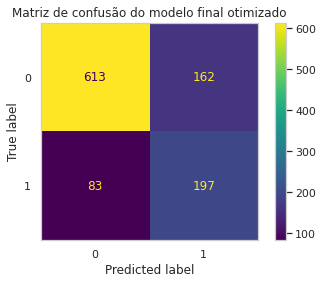

In [147]:
# Mostrar a matriz de confusão
cm = confusion_matrix(y_test_enc, y_pred_final)

cm_disp = ConfusionMatrixDisplay(cm, display_labels=XGB_final_otimizado.classes_)

cm_disp.plot()

plt.title('Matriz de confusão do modelo final otimizado')
plt.grid(False)

plt.show()

In [148]:
print(classification_report(y_test_enc, y_pred_final, output_dict=False))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       775
           1       0.55      0.70      0.62       280

    accuracy                           0.77      1055
   macro avg       0.71      0.75      0.73      1055
weighted avg       0.79      0.77      0.78      1055



O modelo otimizado teve uma acurácia de 0.77, um recall de 0.75 e precision macro de 0.71.

O resultado ainda indica uma melhor detecção para os casos da classe 0, **clientes sem churn**. Podemos dizer que, em média, o modelo tem uma capacidade se acertar 70% dos casos de churn.

## **6. Salvamento os arquivos**

Irei salvar o modelo final e os encodings com joblib

In [124]:
from pickle import dump, load

In [149]:
# Salvando o X_encoder
dump(X_enc, open('X_enc_model.sav', 'wb'))

In [154]:
dump(minmax_scalar, open('minmax_enc_model.sav', 'wb'))

In [150]:
# Salvando o y_encoder
dump(lb, open('lb_enc_model.sav', 'wb'))

In [151]:
# Salvando o modelo final
XGB_final_otimizado.save_model("XGB_final_otimizado.json")
XGB_final_otimizado.save_model("XGB_final_otimizado.ubj")

XGB_final_otimizado.save_model("XGB_final_otimizado.model")

In [152]:
dump(XGB_final_otimizado, open('XGB.sav', 'wb'))

In [153]:
dump(XGB_final_otimizado, open('XGB_final_otimizado.sav', 'wb'))

## **7. Prevendo novos dados**

A partir daqui irei construir uma interface com streamlit.

O código estará disponível no link do projeto no github.